<a href="https://colab.research.google.com/github/lmoss/onesharp/blob/main/tiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## these are just my notes as I learn matplotlib in order to display tile sets assoicsated to 1# programs



In [ ]:
!python -m pip install -U setuptools
!python -m pip install -U git+https://github.com/lmoss/onesharp.git@main
from onesharp.interpreter.interpreter import *


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 28.9 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
numba 0.56.2 requires setuptools<60, but you have setuptools 65.3.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/lmoss/onesharp.git (to revision main) to /tmp/pip-req-build-rqp4_cq2
  Running command git clone -q https://github.com/lmoss/onesharp.git /tmp/pip-req-build-rqp4_cq2
  Installing build dependencies ... done
  Getting re

In [ ]:
## This is from interpretyer.py

def expanded_with_tiles(gorp):
    pgorp = parse(gorp)
    wwgorp = [[pgorp[x],instruction_gloss(pgorp[x],x),[],[]] for x in range(len(pgorp))]
    return(wwgorp)

def parse_explain_with_tiles(prog):
    df = pd.DataFrame(prog, columns=["instr", ' instr number', 'explanation','tile number','tile'])
    df.index = np.arange(1, len(df) + 1)
    def make_pretty(styler):
                styler.set_properties(**{'background-color': '#C9DFEC'})        
                styler.set_properties(**{'text-align': 'left'})
                styler.set_properties(index=False) #    df.to_string(index=False)
                return styler
    display(df.style.pipe(make_pretty))
    #display(df)

In [ ]:
simple = '1#1##'

In [ ]:
pre_table = [['1#',1,'add 1 to R1', 1, (0,1,4,3)], ['','','',2, (13,4,2,5)], ['1##',2, 'add # to R1', 3, (1,4,5,3)]]
parse_explain_with_tiles(pre_table)

,instr,instr number,explanation,tile number,tile
1,1#,1,add 1 to R1,1,"(0, 1, 4, 3)"
2,,,,2,"(13, 4, 2, 5)"
3,1##,2,add # to R1,3,"(1, 4, 5, 3)"


In [ ]:
# codes below
blank = 0
diamond = 1
heart = 2
end_marker = 3
one = 4
hash = 5
start = 6
copy = 7
frown = 8

overhead = [(blank,blank,blank,blank), (blank,1,end_marker, start),
            (diamond,one,diamond,one),(diamond,hash,diamond,hash),
            (blank,one,diamond,blank),(heart,1,heart,1),
            (heart,hash,heart,hash), (blank,hash,heart,hash),
            (one,one,one,one), (one,one,hash,hash),
            (hash,hash,one,one),(hash,hash,hash,hash),
            (blank,blank,one,one),(blank,blank,hash,hash)]

overhead_plus = [['','','','',x] for x in overhead]

def add_tiles(parsed_prog,N):
  k = len(parsed_prog)
  yet_to_go = parsed_prog
  already_done = []
  tile_number = 1
  for i in range(0,k):
    j = i + N
    top_pair = yet_to_go[0]
    tuple = top_pair[0]
    tp = instruction_type(tuple)
    if tp == 'add1':
        extension = [tuple,i+1,top_pair[1],tile_number+N,(diamond,j+2,end_marker,j+1)]
        already_done = already_done + [extension]
        tile_number = tile_number+ 1  
    if tp == 'add#':
        extension = [tuple,i+1,top_pair[1],tile_number+N,(heart,j+2,end_marker,j+1)]
        already_done = already_done + [extension]
        tile_number = tile_number+ 1 
    if tp == 'forward':
        m = len(tuple)-3
        extension = [tuple,i+1,top_pair[1],tile_number+N,(copy,j+m+1,end_marker,j+1)]
        already_done = already_done + [extension] 
        tile_number = tile_number+ 1   
    if tp == 'backward':
        m = len(tuple)-4
        extension = [tuple,i+1,top_pair[1],tile_number+N,(copy,j-m+1,end_marker,j+1)]
        already_done = already_done + [extension]
        tile_number = tile_number+ 1    
    if tp == 'cases':
        extension1 = [tuple,i+1,top_pair[1],tile_number+N,(blank,frown,end_marker,j+1)]
        extension2 = ['','','',tile_number+N+1,(one,j+3,end_marker,j+1)]
        extension3 = ['','','',tile_number+N+2,(hash,j+4,end_marker,j+1)] 
        already_done = already_done + [extension1] + [extension2] + [extension3] 
        tile_number = tile_number+ 3
    yet_to_go = yet_to_go[1:]
  return(already_done)


In [ ]:
parse_explain_with_tiles(overhead_plus)

,instr,instr number,explanation,tile number,tile
1,,,,,"(0, 0, 0, 0)"
2,,,,,"(0, 1, 3, 6)"
3,,,,,"(1, 4, 1, 4)"
4,,,,,"(1, 5, 1, 5)"
5,,,,,"(0, 4, 1, 0)"
6,,,,,"(2, 1, 2, 1)"
7,,,,,"(2, 5, 2, 5)"
8,,,,,"(0, 5, 2, 5)"
9,,,,,"(4, 4, 4, 4)"
10,,,,,"(4, 4, 5, 5)"


In [ ]:
w == expanded(diag)

True

In [ ]:
parse_explain_with_tiles(add_tiles(w,14))

,instr,instr number,explanation,tile number,tile
1,1#####,1,cases on R1,15,"(0, 8, 3, 15)"
2,,,,16,"(4, 17, 3, 15)"
3,,,,17,"(5, 18, 3, 15)"
4,11111111111###,2,go forward 11 to instruction 13,18,"(7, 27, 3, 16)"
5,111111###,3,go forward 6 to instruction 9,19,"(7, 23, 3, 17)"
6,11##,4,add # to R2,20,"(2, 19, 3, 18)"
7,111#,5,add 1 to R3,21,"(1, 20, 3, 19)"
8,111##,6,add # to R3,22,"(2, 21, 3, 20)"
9,111##,7,add # to R3,23,"(2, 22, 3, 21)"
10,1111111####,8,go backward 7 to instruction 1,24,"(7, 15, 3, 22)"


In [ ]:
def just_the_tiles(p):
  q = expanded(p)
  L = len(overhead)
  z = add_tiles(q,L)
  return(overhead + [x[-1] for x in z])

In [ ]:
just_the_tiles('1#1#1##')

[(0, 0, 0, 0),
 (0, 1, 3, 6),
 (1, 4, 1, 4),
 (1, 5, 1, 5),
 (0, 4, 1, 0),
 (2, 1, 2, 1),
 (2, 5, 2, 5),
 (0, 5, 2, 5),
 (4, 4, 4, 4),
 (4, 4, 5, 5),
 (5, 5, 4, 4),
 (5, 5, 5, 5),
 (0, 0, 4, 4),
 (0, 0, 5, 5),
 (1, 16, 3, 15),
 (1, 17, 3, 16),
 (2, 18, 3, 17)]

In [ ]:
[x[-1] for x in add_tiles(expanded(diag),14)]

[(0, 8, 3, 1),
 (4, 3, 3, 1),
 (5, 4, 3, 1),
 (7, 13, 3, 2),
 (7, 9, 3, 3),
 (2, 5, 3, 4),
 (1, 6, 3, 5),
 (2, 7, 3, 6),
 (2, 8, 3, 7),
 (7, 1, 3, 8),
 (1, 10, 3, 9),
 (1, 11, 3, 10),
 (2, 12, 3, 11),
 (7, 8, 3, 12),
 (0, 8, 3, 13),
 (4, 15, 3, 13),
 (5, 16, 3, 13),
 (7, 20, 3, 14),
 (7, 18, 3, 15),
 (2, 17, 3, 16),
 (7, 13, 3, 17),
 (1, 19, 3, 18),
 (7, 17, 3, 19),
 (0, 8, 3, 20),
 (4, 22, 3, 20),
 (5, 23, 3, 20),
 (7, 27, 3, 21),
 (7, 25, 3, 22),
 (2, 24, 3, 23),
 (7, 20, 3, 24),
 (1, 26, 3, 25),
 (7, 24, 3, 26)]

In [ ]:
fimport pandas as pd
from IPython.display import display
import numpy as np

def program_checker(str):
    m = len(str)
    x1 = str[m - 1] == '#'
    x2 = all((str[i] == '1' or str[i] == '#') for i in range(m))
    x3 = (str.find('######') == -1)
    if (x1 and x2 and x3):
        flag = True
    else:
        flag = False
        print('The input ' + str + ' is not a valid 1# program.')
        print('It is not the concatenation of a sequence of instructions in the language.')
        print('So what you are asking for is undefined.')
    return (flag)

def one_or_sharp_check(letter):
    if (letter=="1" or letter=="#"):
        return(True)
    else:
        return(False)

def word_checker(strg):
    answer = all([one_or_sharp_check(x)==True for x in strg])
    return(answer)

def input_checker(input_seq):
    seq = [word_checker(x) for x in input_seq]
    flag = all([word_checker(x) for x in input_seq])
    if not flag:
        print('The input sequence contains words with characters other than 1 and #.')
        print('So what you are asking for is undefined.')
    return(flag)
                                                                                
class Augmented:
    def __init__(self, string, remainders):
        self.string = string
        self.remainders = remainders

class Snapshot:
    def __init__(self, instr_number, regs, proceed,verbose,program_length, step_number):
        self.instr_number = instr_number
        self.regs = regs
        self.proceed = proceed
        self.verbose = verbose
        self.program_length = program_length
        self.step_number = step_number
        
def preparse(xstr):
    b = xstr.string.find('#1')
    xstr.remainders = xstr.remainders + [xstr.string[:(b + 1)]]
    xstr.string = xstr.string[(b + 1):]
    return (xstr)



def parse(y):
    tempx = Augmented(y, [])
    while tempx.string.find('#1') >= 0:
        tempx = preparse(tempx)
    return (tempx.remainders + [tempx.string])

def unparse(p):
    return (''.join(p))

def ones(n):
    w = ['1' for i in range(n)]
    return(unparse(w))    

def instruction_type(instruction):
    if instruction[-2:] == '1#':
        return ('add1')
    if instruction[-3:] == '1##':
        return ('add#')
    if instruction[-4:] == '1###':
        return ('forward')
    if instruction[-5:] == '1####':
        return ('backward')
    if instruction[-6:] == '1#####':
        return ('cases')

def tail(list):
    return (list[1:])

def one_step(p, snapshot): # p is parsed
    i = snapshot.instr_number
    r = snapshot.regs
    instruction = p[-1 + i]
    if snapshot.verbose:
        print('Step ' + str(snapshot.step_number) + ':')
        print('Execute instruction ' + str(i) + ':' + " " +
              instruction_gloss(instruction,i-1) 
              + '.')
        if instruction_type(instruction)=='cases':
            billy= len(instruction) - 5
            if snapshot.regs[billy-1] == "":
                print('The register is empty, so we go ahead 1 instruction.')
            elif snapshot.regs[billy-1][0] == "1":
                print('The first symbol in that register is 1,' +
                      ' so we delete that symbol and go forward 2 instructions.')
            elif snapshot.regs[billy-1][0] == "#":
                print('The first symbol in that register is #,' +
                      ' so we delete that symbol and go forward 3 instructions.')     
    t = instruction_type(instruction)
    if t == 'add1':
        snapshot.instr_number = 1 + snapshot.instr_number
        l = len(instruction)
        reg = len(instruction[:(l - 1)])
        snapshot.regs[reg - 1] = snapshot.regs[reg - 1] + '1'
    if t == 'add#':
        snapshot.instr_number = 1 + snapshot.instr_number
        l = len(instruction)
        reg = len(instruction[:(l - 2)])
        snapshot.regs[reg - 1] = snapshot.regs[reg - 1] + '#'
    if t == 'forward':
        l = len(instruction)
        offset = len(instruction[:(l - 3)])
        snapshot.instr_number = offset + snapshot.instr_number
    if t == 'backward':
        l = len(instruction)
        offset = len(instruction[:(l - 4)])
        snapshot.instr_number = (-offset) + snapshot.instr_number
    if t == 'cases':
        l = len(instruction)
        reg = len(instruction[:(l - 5)])
        if snapshot.regs[reg - 1] == '':
            snapshot.instr_number = 1 + snapshot.instr_number
        elif snapshot.regs[reg - 1][0] == '1':
            snapshot.instr_number = 2 + snapshot.instr_number
            snapshot.regs[reg - 1] = tail(snapshot.regs[reg - 1])
        elif snapshot.regs[reg - 1][0] == '#':
            snapshot.instr_number = 3 + snapshot.instr_number
            snapshot.regs[reg - 1] = tail(snapshot.regs[reg - 1])
    snapshot.proceed = 0< snapshot.instr_number <= len(p)
    if snapshot.verbose == True:
        print_snapshot(snapshot)
    return (snapshot)


def number_help(instr):
    if instruction_type(instr) == 'add1':
        return (len(instr) - 1)
    if instruction_type(instr) == 'add#':
        return (len(instr) - 2)
    if instruction_type(instr) == 'cases':
        return (len(instr)-5)
    else:
        return (0)


def max_register(p):
    return (max([number_help(instr) for instr in parse(p)]))


def pad(p, register_inputs):
    n = len(register_inputs)
    m = max_register(p)
    extras = ['' for x in range(m - n)]
    bigger = register_inputs + extras
    return (bigger)

def print_snapshot(snap):
    regdf = pd.DataFrame([[snap.regs[n]] for n in range(len(snap.regs))],columns=["contents"])
    regdf.index = np.arange(1, len(regdf) + 1)
    def make_pretty(styler):
        styler.set_properties(**{'background-color': '#FFFFCC',
                                 'color': 'black'})
        styler.set_properties(**{'text-align': 'left'})
        #styler.set_caption("at the start")
        #styler.hide(axis='index')
        return styler
    display(regdf.style.pipe(make_pretty))  

def step_by_step(word_prog, register_inputs):
    word_prog = word_prog.replace(" ", "")
    register_inputs = [word.replace(" ", "") for word in register_inputs]
    if program_checker(word_prog) and input_checker(register_inputs):
        print('First, here is the program:')
        parse_explain(word_prog)
        print()
        regs = pad(word_prog, register_inputs)
        prog = parse(word_prog)
        N = len(prog)
        snap = Snapshot(1, regs,True,True,N,1)
        print('The computation starts with the register contents shown below.')
        print('The registers include those those which you entered as part of the input')
        print('and also others mentioned in the input program.')
        print_snapshot(snap)
        print()
        while 0 < snap.instr_number < N + 1:
            snap = one_step(prog, snap)
            snap.step_number = (snap.step_number) + 1
        if snap.instr_number <= 0:
            print(
                'The computation has not halted properly ' +
                'because the control went above instruction 1 of the program.'
                 )
        elif (snap.instr_number == (N + 1)) and all(
                snap.regs[i] == ""
                for i in range(1, len(snap.regs))):
            print(
                'The computation then halts properly because' +
                ' the control is just below the last line of the program,')
            print('and because all registers other than R1 are empty.')
            if snap.regs[0] == "":
                print('The output is the empty word.')
            else:
                print('The output is ' + snap.regs[0] + '.')
        else:
            print('This computation does not halt.')
            if snap.instr_number != N + 1:
                print('This is because the program has ' + str(len(prog)) +
                  ' instructions, and control at the end is not one line ' + 
                   'below the bottom of the program.')
                print()
            else: 
                not_blank = [
                    i + 1 for i in range(1, len(snap.regs))
                    if snap.regs[i] != ""
                ]
                print('Here is the list of registers whose contents ' +
                      'are not empty at this point, other than R1:' +
                      str(not_blank) + '.')
                print('The register contents at the end are shown above.')


def onesharp(word_prog, register_inputs):
    word_prog = word_prog.replace(" ", "")
    register_inputs = [word.replace(" ", "") for word in register_inputs]  
    if program_checker(word_prog) and input_checker(register_inputs):
        register_inputs = [word.replace(" ", "") for word in register_inputs]
        regs = pad(word_prog, register_inputs)
        prog = parse(word_prog)
        N = len(prog)
        snap = Snapshot(1, regs,True,False, N, 1)
        while snap.proceed:
            snap = one_step(prog, snap)
            snap.step_number = (snap.step_number)+1
        if (snap.instr_number == (N + 1)) and all(
                snap.regs[i] == "" for i in range(1, len(snap.regs))):
            return ((snap.regs)[0])
        else:            
            print("This is undefined.")
            print("The register contents at the end are shown below.")
            print_snapshot(snap)
    else:
        return('undefined')


def instruction_gloss(instr,line):
    if instruction_type(instr) == 'add1':
        return ('add 1 to R' + str(len(instr) - 1))
    if instruction_type(instr) == 'add#':
        return ('add # to R' + str(len(instr) - 2))
    if instruction_type(instr) == 'forward':
        w = len(instr) - 3
        return ('go forward ' + str(w) + ' to instruction ' + str(w+line+1))
    if instruction_type(instr) == 'backward':
        w = len(instr) - 4
        return ('go backward ' + str(w) + ' to instruction ' + str(line - w+1))
    if instruction_type(instr) == 'cases':
        return ('cases on R' + str(len(instr) - 5))

def expanded(gorp):
    pgorp = parse(gorp)
    wwgorp = [[pgorp[x],instruction_gloss(pgorp[x],x)] for x in range(len(pgorp))]
    return(wwgorp)

def parse_explain(prog):
    df = pd.DataFrame(expanded(prog),
                      columns=["instruction", 'explanation'])
    df.index = np.arange(1, len(df) + 1)
    def make_pretty(styler):
                styler.set_properties(**{'background-color': '#C9DFEC',
                                         'color': 'black'})        
                styler.set_properties(**{'text-align': 'left'})
                return styler
    display(df.style.pipe(make_pretty))
    #display(df)
    

length = '1#####1111111###11####11#1#####111###111111####111####11#####111111###111###1##1111####1#111111####'

write = '1#####111111111###11111###11#11##11##111111####11#11##111111111####11#####111111###111###1##1111####1#111111####'

diag = '1#####11111111111###111111###11##111#111##111##1111111####11#111#111##1111####111#####111111###111###1##1111####1#11####11#####111111###111###1##1111####1#11####'

self = '1#1##1##1##1##1##1#1#1#1#1#1#1#1#1#1#1#1##1##1##1#1#1#1#1#1#1##1##1##1#1#1##1##1#1#1#1##1#1#1#1##1##1#1#1#1##1##1#1#1#1#1#1#1#1##1##1##1##1#1#1##1#1#1#1##1#1#1#1##1##1#1#1#1#1##1##1##1##1#1#1#1##1##1##1##1##1#1#1#1#1#1#1##1##1##1#1#1#1##1##1##1#1##1##1#1#1#1#1##1##1##1##1#1##1#1#1##1##1##1##1#1#1##1##1##1##1##1#1#1#1#1#1#1##1##1##1#1#1#1##1##1##1#1##1##1#1#1#1#1##1##1##1##1#1##1#1#1##1##1##1##1#####11111111111###111111###11##111#111##111##1111111####11#111#111##1111####111#####111111###111###1##1111####1#11####11#####111111###111###1##1111####1#11####'

multiply = '111##1111##11#####11111111###1111###11111##111111##11111####11111#111111#11111111####111111#####111111###111###11##1111####11#111111####111#####11111111###1111###111111##1111111##11111####111111#1111111#11111111####1111111#####111111###111###111##1111####111#111111####11111#####111111###111111111###111111#####11111111111###1111111111###111111####111111#####111111111111111###111111###11111###111111#####111###1111111111111####1###11111#####1  11###11####111####111111#####1111###11####111####11111#11111#####111###1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111###1#1#####11111111###1111###11111##111111##11111####11111#111111#11111111####111111#####111111###111###1##1111####1#111111####1111#####111111###111###111111##1111####111111#111111####11111#####111###111111###111111111###111111#####11111111111111111111111111111111111###11111111111111111111111111###111111111111111111111111111###111111#####11111111111111111111111###1111111111111111111111111111###111111111111111111111###111111#####111111111111111111111###111111111111111111###1111111111111111111###11111#####111###111111###111111111###111111#####11111111111###1111111111111111###111111111###111111#####1111111111111###1111111111###11111111111###111111#####111###11111111###1###1111111#111111111111111111111111111111111####1111111##11111111111111111111111111111111111####1111111#111111111111111111111####1111111##11111111111111111111111####1###1111111#####111111###111###11111##1111####11111#111111####11111#####111111###111###1111##1111####1111#111111####111#####1111111111111###1111111111###11111#111#####111111###111###11111##1111####11111#111111####1111###11111##1111111111111####11111#11111#####111111###111###111##1111####111#111111####1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111####1#####111###11####111####11#####111###11####111####111#####111###11####111####1111#####111111###111###1##1111####1#111111####'

universal = '1#####1###11###11####111111#1#####111###111111###1111111###11111#####1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111###1###1####111#111111111####111##1#####1111###11###11111###111#11111#####1111111111111111111111111111111111111111111111###111111111###111##1#####1111###11###11111###111#11111#####1111111111111111111111111111111111111###111111111###111##1#####1111###11###11111###111#11111#####1111111111111111111111111111111111111111111111###111111111###111##1#####1111###11###11111###111#11111#####111111111111111111111111111111111111111111111111111111###111111111###111##1#####1111###11###11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111###111#11111#####1111111111###1###111#####111111###111###1111##1111####1111#111111####11111111111111111111111111111111111111111111111111111111111111####111#####1###11###1111###11111#1111#111111####11111##1111##111#####1111111###1111###1111##11111##11111####1111#1111111####111111111111111111111111111111111111111111111111111111111111111111111111111###111#####1###11###11111###11111#1111#111111#1111111####1111##111#####111111###111###1111##1111####1111#111111####11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111####111#####1###11###1111###1111#11111#111111####11111#11111#1111##111#####111111###111###1111##1111####1111#111111####11111#####11111111###11###1###111111#####111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111###1###1###11111111####111111#####1111###111#11111#1111####111#####111###111111#111####1#####111111###111###111##1111####111#111111####1111#####111111###111###1##1111####1#111111####111#####111111###111###1##1111####1#111111####111111111111111111111111111111111111111111111111111111111####11#####111###11111###111111111111###11##11##111111####111#11#####1###111###111##11###111#11111111111111####111##11#####11111111111111111111111111111111111111111111111111111111111111111111###1###111##11111#####1###1111111111111111111111####11111#####1111111111111111111111111111###111111111111111111111111111###11111#####111###11###111111111111111111111111111111111111111111111###11#####111111111111111111###111111111###111#11#####1###1###111#111##111##111111111111111111111111111111111111111111111111111111111###111#11#####1###111###111##11###111#111111111111111111####111#111#1111111111111111111111111111111111111111111111###11#####111111111111111111###111111111###111#11#####1###1###111##111##111##11111111111111111111111111111111111###111#11#####1###111###111##11###111#111111111111111111####111#111##111111111111111111111111###11111#####1###1###11111#####1###1###11#####11111111111111111111111###111###111##1111111111111###11#####1###11111###1###11111#111111#111111###11111#11111#111111#111111#1###11#####111111###111###111##1111####111#111111####111#####111111###111###11##1111####11#111111####1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111####11#####1###1###11#####1###1###11#####11111111111111###11###11111111###11#####1###111###1#11111111####1##1111111111####11#####111###11####111####111111#####11###11####1111#####111###11####111####'
clear_2 = '11#####111###11####111####'
clear_3 = '111#####111###11####111####'
clear_4 = '1111#####111###11####111####'
move_1_2= '1#####111111###111###11##1111####11#111111####'
move_1_3= '1#####111111###111###111##1111####111#111111####'
move_1_4= '1#####111111###111###1111##1111####1111#111111####'
move_2_1= '11#####111111###111###1##1111####1#111111####'
move_2_3= '11#####111111###111###111##1111####111#111111####'
move_2_4= '11#####111111###111###1111##1111####1111#111111####'
move_3_1= '111#####111111###111###1##1111####1#111111####'
move_3_2= '111#####111111###111###11##1111####11#111111####'
move_3_4= '111#####111111###111###1111##1111####1111#111111####'
move_4_1= '1111#####111111###111###1##1111####1#111111####'
move_4_2= '1111#####111111###111###11##1111####11#111111####'
move_4_3= '1111#####111111###111###111##1111####111#111111####'
copy_1_2_3 = '1#####11111111###1111###11##111##11111####11#111#11111111####111#####111111###111###1##1111####1#111111####'
copy_1_2_4 ='1#####11111111###1111###11##1111##11111####11#1111#11111111####1111#####111111###111###1##1111####1#111111####'
copy_1_3_4='1#####11111111###1111###111##1111##11111####111#1111#11111111####1111#####111111###111###1##1111####1#111111####'
copy_2_3_4 = '11#####11111111###1111###111##1111##11111####111#1111#11111111####1111#####111111###111###11##1111####11#111111####'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure()

left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

# Draw a rectangle in figure coordinates ((0, 0) is bottom left and (1, 1) is
# upper right).
p = patches.Rectangle((left, bottom), width, height, fill=False)
fig.add_artist(p)

# Figure.text (aka. plt.figtext) behaves like Axes.text (aka. plt.text), with
# the sole exception that the coordinates are relative to the figure ((0, 0) is
# bottom left and (1, 1) is upper right).
fig.text(left, bottom, 'left top',
         horizontalalignment='left', verticalalignment='top')
fig.text(left, bottom, 'left bottom',
         horizontalalignment='left', verticalalignment='bottom')
fig.text(right, top, 'right bottom',
         horizontalalignment='right', verticalalignment='bottom')
fig.text(right, top, 'right top',
         horizontalalignment='right', verticalalignment='top')
fig.text(right, bottom, 'center top',
         horizontalalignment='center', verticalalignment='top')
fig.text(left, 0.5*(bottom+top), 'right center',
         horizontalalignment='right', verticalalignment='center',
         rotation='vertical')
fig.text(left, 0.5*(bottom+top), 'left center',
         horizontalalignment='left', verticalalignment='center',
         rotation='vertical')
fig.text(0.5*(left+right), 0.5*(bottom+top), 'middle',
         horizontalalignment='center', verticalalignment='center',
         fontsize=20, color='red')
fig.text(right, 0.5*(bottom+top), 'centered',
         horizontalalignment='center', verticalalignment='center',
         rotation='vertical')
fig.text(left, top, 'rotated\nwith newlines',
         horizontalalignment='center', verticalalignment='center',
         rotation=45)
plt.show()

<Figure size 432x288 with 0 Axes>

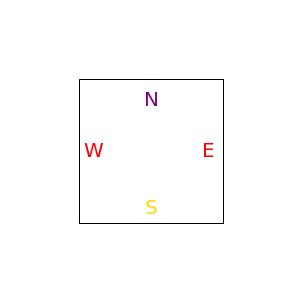

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# axes coordinates are 0,0 is bottom left and 1,1 is upper right
p = patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False
    )

ax.add_patch(p)


ax.text(0.5*(left+right), 0.9*(top), 'N',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='purple',
        transform=ax.transAxes)

ax.text(0.5*(left+right), 0.3*(bottom+top), 'S',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='gold',
        transform=ax.transAxes)

ax.text(0.3*(left+right), 0.5*(bottom+top), 'W',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='red',
        transform=ax.transAxes)

ax.text(0.7*(left+right), 0.5*(bottom+top), 'E',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='red',
        transform=ax.transAxes)

ax.set_aspect('equal', adjustable='box')
ax.set_axis_off()
plt.show()

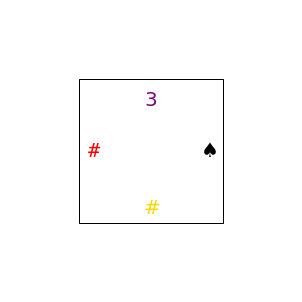

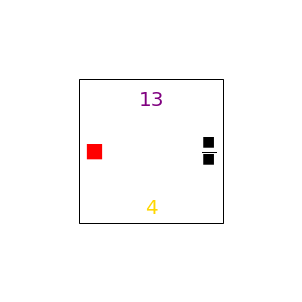

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def tile(a,b,c,d):
  left, width = .25, .5
  bottom, height = .25, .5
  right = left + width
  top = bottom + height
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
# axes coordinates are 0,0 is bottom left and 1,1 is upper right
  p = patches.Rectangle(
      (left, bottom), width, height,
     fill=False, transform=ax.transAxes, clip_on=False
     )

  ax.add_patch(p)


  ax.text(0.5*(left+right), 0.9*(top), a,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='purple',
        transform=ax.transAxes)

  ax.text(0.5*(left+right), 0.3*(bottom+top), c,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='gold',
        transform=ax.transAxes)

  ax.text(0.3*(left+right), 0.5*(bottom+top), d,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='red',
        transform=ax.transAxes)

  ax.text(0.7*(left+right), 0.5*(bottom+top), b,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='black',
        transform=ax.transAxes)

  ax.set_aspect('equal', adjustable='box')
  ax.set_axis_off()
  plt.show()


tile('3','$\spadesuit$',r'$\#$', r'${\tt \#}$')
tile('13',r'$\frac{\blacksquare}{\blacksquare}$','4', r'$\blacksquare$')



In [ ]:
!pip install PyQt4
import sys  
from PyQt4 import QtCore, QtGui

def F(n, m):
    return n + m

class MainWindow(QtGui.QWidget):
    # http://stackoverflow.com/a/11458784/190597 (reclosedev)
    def __init__(self, parent=None):
        self.rows = range(50)
        self.cols = range(100)
        super(MainWindow, self).__init__(parent)
        self.table_widget = QtGui.QTableWidget()
        layout = QtGui.QVBoxLayout()
        layout.addWidget(self.table_widget)
        self.setLayout(layout)
        self.populate()

    def populate(self):
        self.table_widget.setRowCount(len(self.rows))
        self.table_widget.setColumnCount(len(self.cols))
        self.table_widget.setHorizontalHeaderLabels(map(str, self.cols))
        for i, n in enumerate(self.rows):
            for j, m in enumerate(self.cols):
                value = QtGui.QTableWidgetItem(str(F(n, m)))
                self.table_widget.setItem(i, j, value)
        self.table_widget.item(5,2).setBackgroundColor(QtGui.QColor(0,255,255))
        self.table_widget.item(5,2).setTextColor(QtGui.QColor("red"))

if __name__ == "__main__":
    app = QtGui.QApplication(sys.argv)
    wnd = MainWindow()
    wnd.resize(640, 480)
    wnd.show()
    sys.exit(app.exec_())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement PyQt4 (from versions: none)
ERROR: No matching distribution found for PyQt4


ModuleNotFoundError: ignored

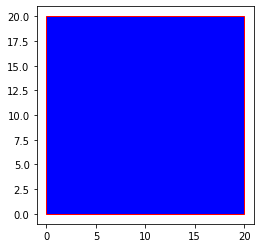

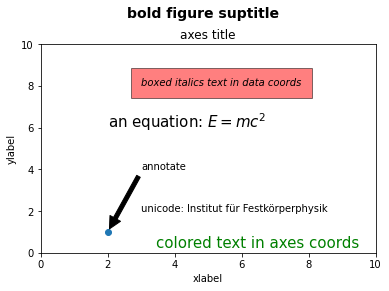

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, 'unicode: Institut f\374r Festk\366rperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set(xlim=(0, 10), ylim=(0, 10))

plt.show()

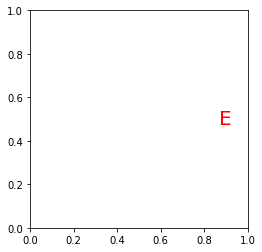

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# adjust coordinates
x = y = [i for i in range(0, 6)]
 
# depict illustration
fig = plt.figure()
ax = fig.add_subplot()
#plt.plot(x, y)
 
ax.text(0.9*(left+right), 0.5*(bottom+top), 'E',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='red',
        transform=ax.transAxes)
 
# square plot
ax.set_aspect('equal', adjustable='box')
plt.show()



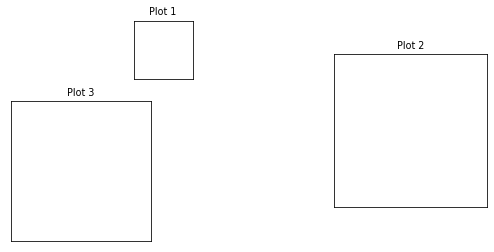

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Placing the plots in the plane
plot1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
plot2 = plt.subplot2grid((3, 3), (0, 2), rowspan=3, colspan=2)
#plot2 = plt.subplot2grid((2,2), (0, 0), colspan=2)
plot3 = plt.subplot2grid((3, 3), (1, 0), rowspan=2)
  
# Using Numpy to create an array x
x = np.arange(1, 10)
  
# Plot for square root

plot2.set_title('Plot 2')
plot2.set_aspect('equal', adjustable='box')
#plot2.set_axis_off() 
plot2.axes.get_xaxis().set_visible(False)
plot2.axes.get_yaxis().set_visible(False)
# Plot for exponent

plot1.set_aspect('equal', adjustable='box')
#plot1.set_axis_off()
plot1.axes.get_xaxis().set_visible(False)
plot1.axes.get_yaxis().set_visible(False)
plot1.set_title('Plot 1')
  
# Plot for Square

plot3.set_aspect('equal', adjustable='box')
plot3.axes.get_xaxis().set_visible(False)
plot3.axes.get_yaxis().set_visible(False)
#plot3.set_axis_off()
plot3.set_title('Plot 3')
  
# Packing all the plots and displaying them
#plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Fixing random state for reproducibility
np.random.seed(19680801)


# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(0, 1), ax.set_xticks([])
ax.set_ylim(0, 1), ax.set_yticks([])

# Create rain data
n_drops = 50
rain_drops = np.zeros(n_drops, dtype=[('position', float, (2,)),
                                      ('size',     float),
                                      ('growth',   float),
                                      ('color',    float, (4,))])

# Initialize the raindrops in random positions and with
# random growth rates.
rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:, 0], rain_drops['position'][:, 1],
                  s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
                  facecolors='none')


def update(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
    current_index = frame_number % n_drops

    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:, 3] = np.clip(rain_drops['color'][:, 3], 0, 1)

    # Make all circles bigger.
    rain_drops['size'] += rain_drops['growth']

    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
    rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 5
    rain_drops['color'][current_index] = (0, 0, 0, 1)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)

    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_edgecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])


# Construct the animation, using the update function as the animation director.
animation = FuncAnimation(fig, update, interval=10)
plt.show()


In [ ]:
s={'(Spade)   J875';'(Heart)   KT64';'(Diamond) QJ842';'(Club)    AKQJ952'}
hF=figure; set(hF,'color',[1 1 1])
hA=axes; set(hA,'color',[1 1 1],'visible','off')
text(0.5,0.5,s)

SyntaxError: ignored

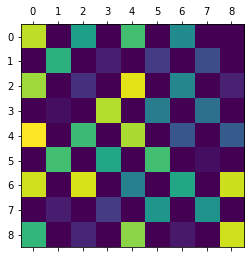

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Make a 9x9 grid...
nrows, ncols = 9,9
image = np.zeros(nrows*ncols)

# Set every other cell to a random number (this would be your data)
image[::2] = np.random.random(nrows*ncols //2 + 1)

# Reshape things into a 9x9 grid.
image = image.reshape((nrows, ncols))

row_labels = range(nrows)
col_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
plt.matshow(image)
#plt.xticks(range(ncols), col_labels)
#plt.yticks(range(nrows), row_labels)
plt.show()

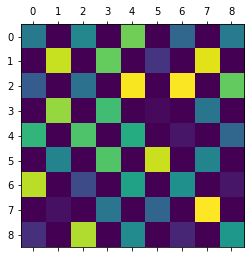

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Make a 9x9 grid...
nrows, ncols = 9,9
image = np.zeros(nrows*ncols)

# Set every other cell to a random number (this would be your data)
image[::2] = np.random.random(nrows*ncols //2 + 1)

# Reshape things into a 9x9 grid.
image = image.reshape((nrows, ncols))

row_labels = range(nrows)
col_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
plt.matshow(image)
#plt.xticks(range(ncols), col_labels)
#plt.yticks(range(nrows), row_labels)
plt.show()

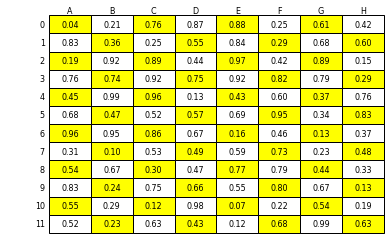

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

from matplotlib.table import Table

def main():
    data = pandas.DataFrame(np.random.random((12,8)), 
                columns=['A','B','C','D','E','F','G','H'])
    checkerboard_table(data)
    fig.set_figheight(5)
    fig.set_figwidth(10)
    plt.show()

def checkerboard_table(data, fmt='{:.2f}', bkg_colors=['yellow', 'white']):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0,0,1,1])

    nrows, ncols = data.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i,j), val in np.ndenumerate(data):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
        idx = [j % 2, (j + 1) % 2][i % 2]
        color = bkg_colors[idx]

        tb.add_cell(i, j, width, height, text=fmt.format(val), 
                    loc='center', facecolor=color)

    # Row Labels...
    for i, label in enumerate(data.index):
        tb.add_cell(i, -1, width, height, text=label, loc='right', 
                    edgecolor='none', facecolor='none')
    # Column Labels...
    for j, label in enumerate(data.columns):
        tb.add_cell(-1, j, width, height/2, text=label, loc='center', 
                           edgecolor='none', facecolor='none')
    ax.add_table(tb)
    return fig

if __name__ == '__main__':
    main()

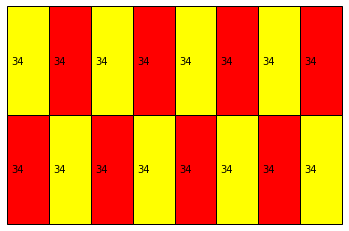

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

from matplotlib.table import Table

def main():
    data = pandas.DataFrame(np.random.random((2,8)), 
                columns=['A','B','C','D','E','F','G','H'])
    checkerboard_table(data)
    plt.show()

def checkerboard_table(data, fmt='{:.2f}', bkg_colors=['yellow', 'red']):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0,0,1,1])
    nrows, ncols = data.shape
    #width, height = 1.0 / ncols, 1.0 / nrows
    width = 3.0 
    height = 1.0

    # Add cells
    for (i,j), val in np.ndenumerate(data):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
        idx = [j % 2, (j + 1) % 2][i % 2]
        color = bkg_colors[idx]

        #tb.add_cell(i, j, width, height, text=fmt.format(val), 
                    #loc='right', facecolor=color)
        tb.add_cell(i, j, width, height, text='34', 
                    loc='left', facecolor=color)

    ax.add_table(tb)
    return fig

if __name__ == '__main__':
    main()

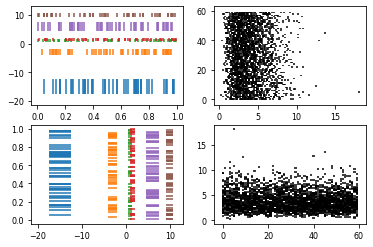

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['font.size'] = 8.0

# Fixing random state for reproducibility
np.random.seed(19680801)


# create random data
data1 = np.random.random([6, 50])

# set different colors for each set of positions
colors1 = ['C{}'.format(i) for i in range(6)]

# set different line properties for each set of positions
# note that some overlap
lineoffsets1 = [-15, -3, 1, 1.5, 6, 10]
linelengths1 = [5, 2, 1, 1, 3, 1.5]

fig, axs = plt.subplots(2, 2)

# create a horizontal plot
axs[0, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1)

# create a vertical plot
axs[1, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1, orientation='vertical')

# create another set of random data.
# the gamma distribution is only used for aesthetic purposes
data2 = np.random.gamma(4, size=[60, 50])

# use individual values for the parameters this time
# these values will be used for all data sets (except lineoffsets2, which
# sets the increment between each data set in this usage)
colors2 = 'black'
lineoffsets2 = 1
linelengths2 = 1

# create a horizontal plot
axs[0, 1].eventplot(data2, colors=colors2, lineoffsets=lineoffsets2,
                    linelengths=linelengths2)


# create a vertical plot
axs[1, 1].eventplot(data2, colors=colors2, lineoffsets=lineoffsets2,
                    linelengths=linelengths2, orientation='vertical')

plt.show()

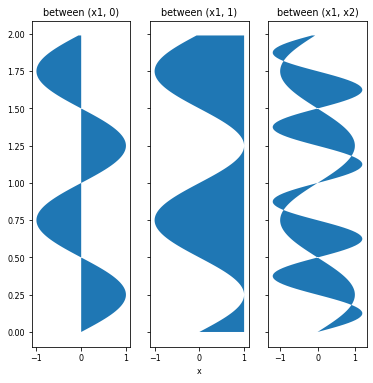

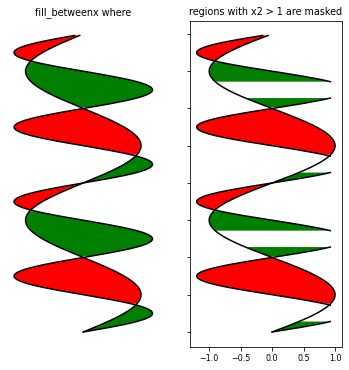

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


y = np.arange(0.0, 2, 0.01)
x1 = np.sin(2 * np.pi * y)
x2 = 1.2 * np.sin(4 * np.pi * y)

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, sharey=True, figsize=(6, 6))

ax1.fill_betweenx(y, 0, x1)
ax1.set_title('between (x1, 0)')

ax2.fill_betweenx(y, x1, 1)
ax2.set_title('between (x1, 1)')
ax2.set_xlabel('x')

ax3.fill_betweenx(y, x1, x2)
ax3.set_title('between (x1, x2)')

#############################################################################
# Now fill between x1 and x2 where a logical condition is met. Note this is
# different than calling::
#
#   fill_between(y[where], x1[where], x2[where])
#
# because of edge effects over multiple contiguous regions.

fig, [ax, ax1] = plt.subplots(1, 2, sharey=True, figsize=(6, 6))
ax.plot(x1, y, x2, y, color='black')
ax.fill_betweenx(y, x1, x2, where=x2 >= x1, facecolor='green')
ax.fill_betweenx(y, x1, x2, where=x2 <= x1, facecolor='red')
ax.set_title('fill_betweenx where')


# Test support for masked arrays.
x2 = np.ma.masked_greater(x2, 1.0)
ax1.plot(x1, y, x2, y, color='black')
ax1.fill_betweenx(y, x1, x2, where=x2 >= x1, facecolor='green')
ax1.fill_betweenx(y, x1, x2, where=x2 <= x1, facecolor='red')
ax1.set_title('regions with x2 > 1 are masked')
plt.show()

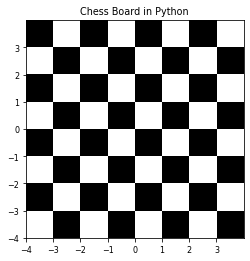

In [ ]:
import numpy as np
import matplotlib.pyplot as pyplot

#Declare the size of the interval dx, dy.
(dx, dy) = (0.015, 0.015)

#Create an array x and y that stores all values with dx and dy intervals,
#respectively, from -4 to 4 (since we need the square). arange() is a NumPy library function
#that gives an array of objects with equally spaced values within a defined interval.
x = np.arange(-4.0, 4.0, dx)
y = np.arange(-4.0, 4.0, dy)

#Plot a rectangle grid with vector coordinates.
(X, Y) = np.meshgrid(x, y)
extent = (np.min(x), np.max(x), np.min(y), np.max(y))

#To calculate the alternate position for coloring, use the outer function,
#which results in two vectors, and the modulus is 2.
z1 = np.add.outer(range(8), range(8)) % 2

#imshow function in MatPlotLib helps in plotting
pyplot.imshow(z1, cmap='binary_r', interpolation='nearest', extent=extent, alpha=1)

def chess(x, y):
    return (1 - x / 2 + x ** 5 + y ** 6) * np.exp(-(x ** 2 + y ** 2))

z2 = chess(X, Y)
pyplot.imshow(z2, alpha=0, interpolation='bilinear', extent=extent)


#set the plot's title.
pyplot.title('Chess Board in Python')

# Save the chart file
#pyplot.savefig('matplotlib_pie_chart01.png', dpi=300)

# Print the chart
pyplot.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


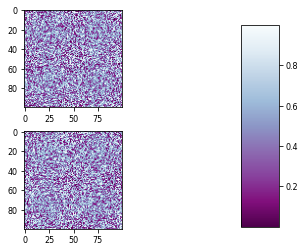

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(211)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)
plt.subplot(212)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)

plt.subplots_adjust(bottom=0.1, right=0.3, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

In [ ]:
class Tree(object):
        def __init__(self, entry, left=None, right=None):
            self.entry = entry
            self.left = left
            self.right = right
        def __repr__(self):
            args = repr(self.entry)
            if self.left or self.right:
                args += ', {0}, {1}'.format(repr(self.left), repr(self.right))
            return 'Tree({0})'.format(args)
def fib_tree(n):
        """Return a Tree that represents a recursive Fibonacci calculation."""
        if n == 1:
            return Tree(0)
        if n == 2:
            return Tree(1)
        left = fib_tree(n-2)
        right = fib_tree(n-1)
        return Tree(left.entry + right.entry, left, right)            

In [ ]:
fib_tree(10).left == fib_tree(8)

False

In [ ]:
zTree = Tree('z')

In [ ]:
fib_tree(10).left == fib_tree(9)

False

In [ ]:

fib_tree(8)

Tree(13, Tree(5, Tree(2, Tree(1), Tree(1, Tree(0), Tree(1))), Tree(3, Tree(1, Tree(0), Tree(1)), Tree(2, Tree(1), Tree(1, Tree(0), Tree(1))))), Tree(8, Tree(3, Tree(1, Tree(0), Tree(1)), Tree(2, Tree(1), Tree(1, Tree(0), Tree(1)))), Tree(5, Tree(2, Tree(1), Tree(1, Tree(0), Tree(1))), Tree(3, Tree(1, Tree(0), Tree(1)), Tree(2, Tree(1), Tree(1, Tree(0), Tree(1)))))))

In [ ]:
!pip install anytree

from anytree import Node, RenderTree
udo = Node("comp")
marc = Node("Marc", parent=udo)
lian = Node("Lian", parent=marc)
dan = Node("Dan", parent=udo)
jet = Node("Jet", parent=dan)
jan = Node("Jan", parent=dan)
sammy = Node("Sammy", parent=joe)
betty = Node("Betty", parent=joe)
#joe = Node("Joe", parent=dan, children=[sammy,betty])
joe = Node("Joe", parent=dan)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
udo = Node("Udo")
marc = Node("Marc", parent=udo)
lian = Node("Lian", parent=marc)
dan = Node("Dan", parent=udo)
jet = Node("Jet", parent=dan)
jan = Node("Jan", parent=dan)
joe = Node("Joe", parent=udo)
sammy = Node("Sammy", parent=joe)
betty = Node("Betty", parent=joe)
#joe = Node("Joe", parent=dan, children=[sammy,betty])



In [ ]:
for pre, fill, node in RenderTree(udo):
...     print("%s%s" % (pre, node.name))

Udo
├── Marc
│   └── Lian
├── Dan
│   ├── Jet
│   └── Jan
└── Joe
    ├── Sammy
    └── Betty


In [ ]:
udo.descendants

(Node('/Udo/Marc'),
 Node('/Udo/Marc/Lian'),
 Node('/Udo/Dan'),
 Node('/Udo/Dan/Jet'),
 Node('/Udo/Dan/Jan'),
 Node('/Udo/Joe'),
 Node('/Udo/Joe/Sammy'),
 Node('/Udo/Joe/Betty'))

In [ ]:
dan.descendants
for pre, fill, node in RenderTree(dan):
...     print("%s%s" % (pre, node.name))

IndentationError: ignored

In [ ]:
def f(tree):
  return length(tree.children)

In [ ]:
f(udo)

NameError: ignored

In [ ]:
from anytree import Node, RenderTree
root = Node("root")
s0 = Node("sub0", parent=root)
s0b = Node("sub0B", parent=s0, foo=4, bar=109)
s0a = Node("sub0A", parent=s0)
s1 = Node("sub1", parent=root)
s1a = Node("sub1A", parent=s1)
s1b = Node("sub1B", parent=s1, bar=8)
s1c = Node("sub1C", parent=s1)
s1ca = Node("sub1Ca", parent=s1c)

In [ ]:
for pre, fill, node in RenderTree(root)):
...     print("%s%s" % (pre, node.name))

SyntaxError: ignored

In [ ]:
 print(RenderTree(root))

Node('/root')
├── Node('/root/sub0')
│   ├── Node('/root/sub0/sub0B', bar=109, foo=4)
│   └── Node('/root/sub0/sub0A')
└── Node('/root/sub1')
    ├── Node('/root/sub1/sub1A')
    ├── Node('/root/sub1/sub1B', bar=8)
    └── Node('/root/sub1/sub1C')
        └── Node('/root/sub1/sub1C/sub1Ca')


In [ ]:
root.descendants

(Node('/root/sub0'),
 Node('/root/sub0/sub0B', bar=109, foo=4),
 Node('/root/sub0/sub0A'),
 Node('/root/sub1'),
 Node('/root/sub1/sub1A'),
 Node('/root/sub1/sub1B', bar=8),
 Node('/root/sub1/sub1C'),
 Node('/root/sub1/sub1C/sub1Ca'))

In [ ]:
from anytree import AnyNode, RenderTree
root = AnyNode(id="root")
s0 = AnyNode(id="sub0", parent=root)
s0b = AnyNode(id="sub0B", parent=s0, foo=4, bar=109)
s0a = AnyNode(id="sub0A", parent=s0)
s1 = AnyNode(id="sub1", parent=root)
s1a = AnyNode(id="sub1A", parent=s1)
s1b = AnyNode(id="sub1B", parent=s1, bar=8)
s1c = AnyNode(id="sub1C", parent=s1)
s1ca = AnyNode(id="sub1Ca", parent=s1c)
print(RenderTree(root).by_attr('id'))

root
├── sub0
│   ├── sub0B
│   └── sub0A
└── sub1
    ├── sub1A
    ├── sub1B
    └── sub1C
        └── sub1Ca


In [ ]:
print(RenderTree(s1).by_attr('id'))

sub1
├── sub1A
├── sub1B
└── sub1C
    └── sub1Ca


In [ ]:
class Tree(object):
    "Generic tree node."
    def __init__(self, name='root', children=None, other='other'):
        self.name = name
        self.other = other
        self.children = []
        if children is not None:
            for child in children:
                self.add_child(child)
    def __repr__(self):
        return self.name
    def add_child(self, node):
        assert isinstance(node, Tree)
        self.children.append(node)
#    *
#   /|\
#  1 2 +
#     / \
#    3   4
t = Tree('*', [Tree('1',[],1),
               Tree('2'),
               Tree('*', [Tree('3'),
                          Tree('4')])],2)

In [ ]:
def arity(tree):
  if tree.name == 'z':
    return(1)
  if tree.name == 's':
    return(1)
  if tree.name == 'proj':
    return(tree.other[1])
  if tree.name == 'comp':
    templist = [arity(u) for u in tree.children[1:]]  
    if all_equal(templist):
      return (templist[0])
    else:
      return(999)
  if tree.name == 'plus':
      return(2)    

In [ ]:
u = Tree('comp', [Tree('proj',[],[2,4]),
               Tree('z'),
               Tree('comp', [Tree('s'),
                          Tree('proj',[],[1,4])])],2)
h = Tree('comp', [Tree('z'),Tree('proj',[], [1,2])])
h2 = Tree('proj',[], [2,4])
print(arity(h2))

h1 = Tree('z')
arity(h2)
all_equal([arity(k) for k in h.children])

h5 = Tree('comp',[Tree('add'),Tree('proj',[],[2,4]), Tree('proj',[],[3,4])])
print('h5 arity' + str(arity(h5)))
h6 = Tree('add')
p_2_4 = Tree('proj',[],[2,4])
print(arity(p_2_4))
[5,6,7][1:]
h5.children

4
h5 arity4
4


[add, proj, proj]

In [ ]:
def maxie(l):
  if l == []:
    return(0)
  else:
    return(max(l))
def height(tree):
  n = maxie([height(u) +1 for u in tree.children])
  return(n)
def all_equal(list):
  if (len(list)==0 or len(list)==1):
    return(True)
  else:
    b = all_equal(list[1:])  
    if b == False:
      return(False)
    else:
      return(list[0]==list[1])

In [ ]:
all_equal([1,1,1,1])

True

In [ ]:
height(v)

3

In [ ]:
def bump_instr(inst, amount):
  if instruction_type(inst) in ['forward','backward']:  
    return(inst) 
  elif instruction_type(inst) == 'add1':  
    n = number_help(inst)
    return(ones(n+amount)+'#')
  elif instruction_type(inst) == 'add#':  
    n = number_help(inst)
    return(ones(n+amount)+'##')
  elif instruction_type(inst) == 'cases':  
    n = number_help(inst)
    return(ones(n+amount)+'#####')
def bump(prog,amount):
  par = parse(prog)
  t = [bump_instr(instr,amount) for instr in par]
  return(unparse(t))

def clear_prog(n):
   a = ones(n) + '#####'
   b = '111###'
   c = '1###'
   d = '111####'
   return(a+b+c+d)

def move_prog(n,m):
   a = ones(n) + '#####'
   b = '111111###'
   c = '111###'
   d = ones(m)+'##'
   e = '1111####'
   f = ones(m)+'#'
   g = '111111####'
   return(a+b+c+d+e+f+g)

def copy_prog(n,m,p):
   a = ones(n) + '#####'
   b = '11111111###'
   c = '1111###'
   d = ones(m)+'##'
   d1 = ones(p) + '##'
   e = '11111####'
   f = ones(m)+'#'
   f1 = ones(p) + '#'
   g = '11111111####'
   return(a+b+c+d+d1+e+f+f1+g+move_prog(p,n))  

def proj_prog(ind,upper):
  index = [k+1 for k in range(ind-1)]    
  #print(index)
  first_part = [clear_prog(j) for j in index]
  #print(first_part)
  if ind == 1:
    middle = []
  else: 
    middle=[move_prog(ind,1)]
  second_index =  [k+ind+1 for k in range(upper-ind)] 
  #print(second_index)
  last_part = [clear_prog(j) for j in second_index]   
  together = first_part + middle + last_part
  done = unparse(together)
  if ind == 1 and upper==1:
    return('1###')
  else:
    return(done)         

In [ ]:
def compose(f,proglist,n):
  # n is number of registers needed by the fns in the proglist
  k = len(proglist)
  a = [copy_all_forward(n,n+i)+bump(proglist[i-1],n+i-1) for i in range(1,k+1)]
  b = unparse(a)
  c = b + bump(f,n)
  ## should have a move of register n+1 back to 1 and a clear
  return(c)

In [ ]:
h = compose(multiply,[proj_prog(2,3),proj_prog(1,3)],3)
n = 3
i = 2
#onesharp(copy_all_forward(n,n+i)+ bump(proj_prog(3,3),4), ['11', '1#', '##1'])
onesharp(h, ['11', '#1', '##1'])

This is undefined.
The register contents at the end are shown below.


,contents
1,11
2,#1
3,##1
4,#11
5,
6,
7,
8,
9,
10,


In [ ]:
parse(move_1_2)

['1#####', '111111###', '111###', '11##', '1111####', '11#', '111111####']

In [ ]:
def copy_all_forward(n,m):
  # copies 1 to m, 2 to m+1, . . . n to m+n-1
  a = [copy_prog(i,m+i-1, m+i) for i in range(1,n+1)]
  return(unparse(a))

In [ ]:
[i for i in range(1,2+1)]

[1, 2]

In [ ]:
i = 2
m = 5
#onesharp(copy_prog(i,m+i-2, m+i-1), ['##','11'])
onesharp(copy_all_forward(2,5),['##','11'])

This is undefined.
The register contents at the end are shown below.


,contents
1,##
2,11
3,
4,
5,##
6,11
7,


In [ ]:
onesharp(multiply,['11','#1'])

'#11'

In [ ]:
pr = copy_all_forward(2,3)+ bump(multiply,2) 
onesharp(pr,['11','#1'])

This is undefined.
The register contents at the end are shown below.


,contents
1,11
2,#1
3,#11
4,
5,
6,
7,
8,
9,


In [ ]:
onesharp(copy_all_forward(2,3),['11','#1'])

This is undefined.
The register contents at the end are shown below.


,contents
1,11
2,#1
3,11
4,#1
5,


In [ ]:
onesharp(bump(multiply,2),['11','#1','11','#1'])

This is undefined.
The register contents at the end are shown below.


,contents
1,11
2,#1
3,#11
4,
5,
6,
7,
8,
9,


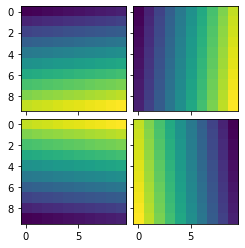

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

im1 = np.arange(100).reshape((10, 10))
im2 = im1.T
im3 = np.flipud(im1)
im4 = np.fliplr(im2)

fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [im1, im2, im3, im4]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()